# Solutions
1. [Datetime and Timedelta](#01.-Datetime-and-Timedelta)
1. [Time Series](#02.-Time-Series)

# 01. Datetime and Timedelta

In [18]:
import pandas as pd

## Problem 1
<span  style="color:green; font-size:16px">What day of the week was Jan 15, 1997?</span>

In [19]:
dt = pd.to_datetime('Jan 15, 1997')
dt.day_name()

'Wednesday'

## Problem 2
<span  style="color:green; font-size:16px">Was 1925 a leap year?</span>

In [20]:
dt = pd.to_datetime('Jan 1, 1924')
dt.is_leap_year

True

## Problem 3
<span  style="color:green; font-size:16px">What year will it be 1 million hours after the UNIX epoch?</span>

In [21]:
dt = pd.to_datetime(10 ** 6, unit='h')
dt

Timestamp('2084-01-29 16:00:00')

In [22]:
dt.year

2084

## Problem 4
<span  style="color:green; font-size:16px">Create the datetime July 20, 1969 at 2:56 a.m. and 15 seconds.</span>

In [23]:
dt = pd.to_datetime('1969-07-20 2:56:15')
dt

Timestamp('1969-07-20 02:56:15')

## Problem 5
<span  style="color:green; font-size:16px">Neil Armstrong stepped on the moon at the time in the last problem. How many days have passed since that happened? Use the string 'today' when creating your datetime.</span>

In [24]:
dt1 = pd.to_datetime('1969-07-20 2:56:15')
dt2 = pd.to_datetime('today')
dt2

Timestamp('2018-09-09 07:43:17.006658')

In [25]:
td = dt2 - dt1
td

Timedelta('17948 days 04:47:02.006658')

In [26]:
td.days

17948

## Problem 6
<span  style="color:green; font-size:16px">Which is larger - 35 days or 700 hours?</span>

In [27]:
td1 = pd.to_timedelta(35, unit='d')
td2 = pd.to_timedelta(700, unit='h')

In [28]:
td1

Timedelta('35 days 00:00:00')

In [29]:
td2

Timedelta('29 days 04:00:00')

In [30]:
td1 > td2

True

Can also use a string for hours

In [31]:
pd.to_timedelta('700 hours')

Timedelta('29 days 04:00:00')

In [32]:
pd.to_timedelta('700h')

Timedelta('29 days 04:00:00')

## Problem 7
<span  style="color:green; font-size:16px">In a previous notebook, we were told that the employee data was retrieved on Dec 1, 2016. We used the simple calculation `2016 - emp['hire_date'].dt.year` to determine the years of experience. Can you improve upon this method to get the exact amount of years of experience and assign as a new column named `experience`?</span>

In [33]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date', 'job_date'])

In [34]:
pull_date = pd.to_datetime('2016-1-1')
one_year = pd.to_timedelta(1, unit='y')

In [35]:
pull_date

Timestamp('2016-01-01 00:00:00')

In [36]:
one_year

Timedelta('365 days 05:49:12')

In [39]:
emp['experience'] = (pull_date - emp['hire_date']) / one_year
emp.head()

,title,dept,salary,race,gender,hire_date,job_date,experience
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic,Female,2006-06-12,2012-10-13,9.555295
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic,Female,2000-07-19,2010-09-18,15.452747
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03,2015-02-03,0.908985
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08,1991-05-25,33.895289
4,ELECTRICIAN,General Services Department,56347.0,White,Male,1989-06-19,1994-10-22,26.535795


# 02. Time Series

In [40]:
import pandas as pd
import requests

## Problem 1
<span  style="color:green; font-size:16px">Read in stock data for Apple (AAPL) for the last 5 years. Set the date as the index and keep just the closing price and the volume columns.</span>

In [41]:
req = requests.get('https://api.iextrading.com/1.0/stock/AAPL/chart/5y')
aapl = pd.read_json(req.text)
aapl.head()

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,1.039900,0.000000,1.596,66.2091,2013-09-09,66.4380,"Sep 9, 13",65.8573,66.0561,12126776,84887432,66.1625
1,-1.508200,-0.022778,-2.278,64.7010,2013-09-10,66.3766,"Sep 10, 13",64.0286,66.2131,26499205,185494435,65.3552
2,-3.522600,-0.075982,-5.444,61.1784,2013-09-11,61.9606,"Sep 11, 13",60.7991,61.0869,32035838,224250866,61.3117
3,0.651405,-0.066143,1.065,61.8298,2013-09-12,62.1843,"Sep 12, 13",60.9560,61.2817,14410688,100874816,61.6663
4,-1.019000,-0.081534,-1.648,60.8108,2013-09-13,61.7172,"Sep 13, 13",60.7847,61.3916,10654129,74578903,61.1075


In [42]:
aapl = aapl.set_index('date')
aapl = aapl[['close', 'volume']]
aapl.head()

,close,volume
date,,
2013-09-09,66.2091,84887432
2013-09-10,64.7010,185494435
2013-09-11,61.1784,224250866
2013-09-12,61.8298,100874816
2013-09-13,60.8108,74578903


## Problem 2
<span  style="color:green; font-size:16px">In which week did AAPL have the greatest number of its shares traded?</span>

In [43]:
volume = aapl.resample('W').agg({'volume':'sum'})
volume.head()

,volume
date,
2013-09-15,670086452
2013-09-22,625812306
2013-09-29,475638086
2013-10-06,370260149
2013-10-13,362235615


In [44]:
volume.idxmax()

volume   2014-02-02
dtype: datetime64[ns]

In [45]:
volume.max()

volume    823094762
dtype: int64

In [46]:
volume.loc[volume.idxmax()]

,volume
date,
2014-02-02,823094762


### Pandas Trick
Turn into a period to get Monday-Sunday date range

In [47]:
aapl.resample('W', kind='period').agg({'volume':'sum'}).idxmax()

volume   2014-01-27/2014-02-02
dtype: object

## Problem 3
<span  style="color:green; font-size:16px">With help from the `diff` method, find the quarter containing the most number of up days.</span>

Use diff to find the difference between the current row and the one directly above it.

In [48]:
aapl['close'].diff().head()

date
2013-09-09       NaN
2013-09-10   -1.5081
2013-09-11   -3.5226
2013-09-12    0.6514
2013-09-13   -1.0190
Name: close, dtype: float64

In [49]:
up_days = aapl['close'].diff() > 0
up_days.head()

date
2013-09-09    False
2013-09-10    False
2013-09-11    False
2013-09-12     True
2013-09-13    False
Name: close, dtype: bool

In [50]:
up_days.resample('Q').sum().head()

date
2013-09-30     6.0
2013-12-31    34.0
2014-03-31    32.0
2014-06-30    36.0
2014-09-30    37.0
Freq: Q-DEC, Name: close, dtype: float64

In [51]:
up_days.resample('Q').sum().idxmax()

Timestamp('2017-03-31 00:00:00', freq='Q-DEC')

### Pandas trick

In [52]:
up_days.resample('Q', kind='period').sum().idxmax()

Period('2017Q1', 'Q-DEC')

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

Can visually verify with plot:

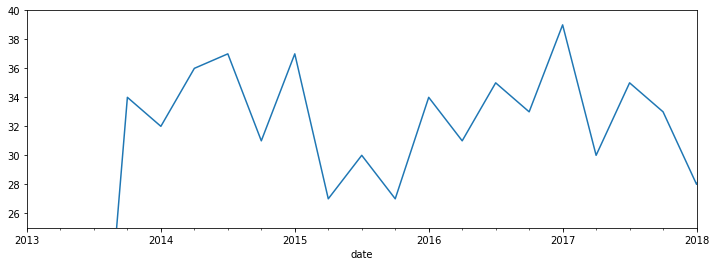

In [54]:
up_days.resample('Q', kind='period').sum().plot(xlim=('2013', '2018'), ylim=(25,40), figsize=(12,4))

## Problem 4
<span  style="color:green; font-size:16px">Find the mean price per year along with the minimum and maximum volume. Have the label for each row be the first day of the year.</span>

In [55]:
aapl.resample('AS').agg({'close': 'mean', 'volume':['min', 'max']})

close    volume           
                  mean       min        max
date                                       
2013-01-01   68.014724  41888735  224250866
2014-01-01   85.756160  14479611  266833581
2015-01-01  113.325166  13046445  162206292
2016-01-01  100.800249  11475922  133369674
2017-01-01  147.846248  14026673  111985040
2018-01-01  183.478775  12519792   86593825

## Problem 5
<span  style="color:green; font-size:16px">Execute the cell below exactly as it is to read in the employee dataset. Then use `to_datetime` to convert the hire and job date columns into datetimes.</span>

In [65]:
emp = pd.read_csv('../data/employee.csv')

In [66]:
emp['hire_date'] = pd.to_datetime(emp['hire_date'])
emp['job_date'] = pd.to_datetime(emp['job_date'])

## Problem 6
<span  style="color:green; font-size:16px">Execute the cell below exactly as it is to read in the employee dataset. Then use `to_datetime` to convert the hire and job date columns into datetimes.</span>

In [67]:
emp.resample('5A', on='hire_date', kind='period').agg({'salary':['mean', 'count']})

salary      
                    mean count
hire_date                     
1958        81239.000000     1
1963                 NaN     0
1968        78102.000000     2
1973       163228.000000     1
1978        67360.000000    59
1983        71052.770115    87
1988        62127.477273   176
1993        62434.307359   231
1998        60819.600000   220
2003        56643.405914   372
2008        51720.457413   317
2013        43852.409524   420

## Problem 7
<span  style="color:green; font-size:16px">Without putting `hire_date` into the index, find the mean salary based on `hire_date` over 5 year periods. Also return the number of salaries used in the mean calculation for each period.</span>

In [68]:
emp.resample('5A', on='hire_date').agg({'salary':['mean', 'count']})

salary      
                    mean count
hire_date                     
1958-12-31  81239.000000     1
1963-12-31           NaN     0
1968-12-31  89590.000000     1
1973-12-31  66614.000000     1
1978-12-31  88503.166667     6
1983-12-31  68284.569231    65
1988-12-31  67941.684783    92
1993-12-31  62461.735043   234
1998-12-31  62693.161616   198
2003-12-31  59833.557851   242
2008-12-31  54777.735294   408
2013-12-31  51783.386076   316
2018-12-31  41921.881988   322

## Problem 8
<span  style="color:green; font-size:16px">Attempt to take a rolling average on salary using a 30 day time span on hire date. Does the error message make sense?</span>

In [70]:
emp.rolling('30D', on='hire_date')

ValueError: hire_date must be monotonic

Yes, the error message makes sense. If you are going to do a rolling average by an amount of time, then the dates need to be sorted. Monotonic means all increasing or all decreasing.

## Problem 9
<span  style="color:green; font-size:16px">Set hire date as the index and then select the salary column as a Series. Sort the Series by date and drop the missing values. Now select a subset that only has hire dates from 1990 onwards. Then find a 1,000 day rolling average. Finally make a call to the `plot` method. Make sure you inline matplotlib if you did not do it earlier.</span>

In [71]:
%matplotlib inline

In [72]:
sal = emp.set_index('hire_date')['salary'].sort_index().dropna()

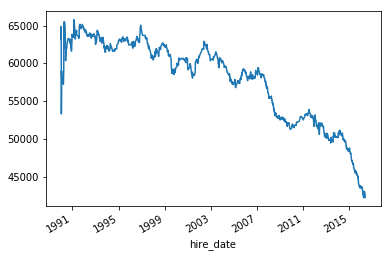

In [73]:
sal['1990':].rolling('1000D').mean().plot()

## Problem 10
<span  style="color:green; font-size:16px">Can you do problem 9 in one line of code? Chain each method on a separate line. (You should probably not do this in real code as it will be messy, but it is possible)</span>

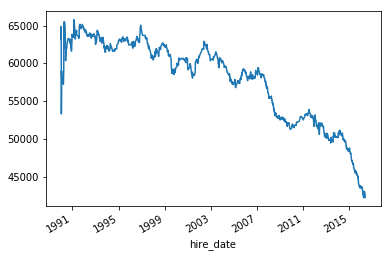

In [74]:
emp.set_index('hire_date')['salary'] \
   .sort_index() \
   .dropna()['1990':] \
   .rolling('1000D') \
   .mean() \
   .plot()